<a href="https://colab.research.google.com/github/venkatvalluri2004/Cognifyz-Technologies_Task/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import joblib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Load Digits Dataset
digits_data = datasets.load_digits()

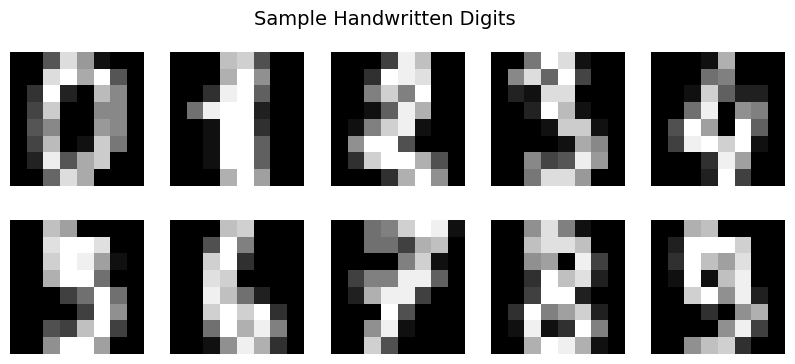

In [41]:
# Display Sample Images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits_data.images[i], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.suptitle("Sample Handwritten Digits", fontsize=14)
plt.show()

In [42]:
# Prepare Data
X = digits_data.data
y = digits_data.target

In [43]:
# Normalize Data (Scale pixel values between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [44]:
# Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Normalize Data (Scale pixel values between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [56]:
X_train

array([[0.        , 0.        , 0.00073529, ..., 0.00318627, 0.00098039,
        0.        ],
       [0.        , 0.        , 0.00220588, ..., 0.00073529, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00147059, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00220588, ..., 0.00392157, 0.0004902 ,
        0.        ],
       [0.        , 0.        , 0.0002451 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0002451 , ..., 0.0002451 , 0.        ,
        0.        ]])

In [57]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.00343137, 0.00122549,
        0.        ],
       [0.        , 0.        , 0.00269608, ..., 0.0002451 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00196078, ..., 0.00196078, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00171569, ..., 0.00245098, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00171569, ..., 0.00392157, 0.00098039,
        0.        ],
       [0.        , 0.        , 0.00343137, ..., 0.00122549, 0.        ,
        0.        ]])

In [46]:
# Define Models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
}

In [58]:
Kmoodel = KNeighborsClassifier(n_neighbors=5)
Kmoodel.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
kpredictions = Kmoodel.predict(X_test)

In [71]:
score = accuracy_score(y_test, kpredictions)*100
print(f"Accuracy: {score:.4f}%")

Accuracy: 98.6111%


In [64]:
Rmodel = RandomForestClassifier(n_estimators=100, random_state=42)
Rmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
Rpredict = Rmodel.predict(X_test)

In [73]:
Rscore = accuracy_score(y_test, Rpredict)*100
print(f"Rscore: {score:.4f}%")

Rscore: 98.6111%


In [47]:
# Train and Evaluate Models
results = {}
conf_matrices = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions) * 100
    results[name] = accuracy
    conf_matrices[name] = confusion_matrix(y_test, predictions)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [48]:
# Store confusion matrix
conf_matrices[name] = confusion_matrix(y_test, predictions)

In [49]:
# Save trained model
joblib.dump(model, f"{name.replace(' ', '_')}_model.pkl")
trained_models[name] = model

In [50]:
# Convert results into a DataFrame and Display
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy (%)"])
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                    Model  Accuracy (%)
0     K-Nearest Neighbors     98.611111
1           Random Forest     97.222222
2                AdaBoost     82.777778
3       Gradient Boosting     96.944444
4  Support Vector Machine      7.777778
5      MLP Neural Network     89.166667


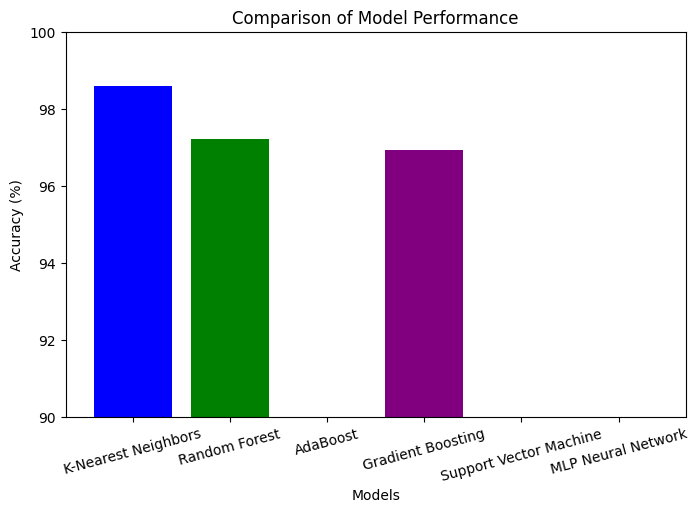

In [51]:
# Plot Performance of Different Models
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Performance")
plt.xticks(rotation=15)
plt.ylim(90, 100)
plt.show()

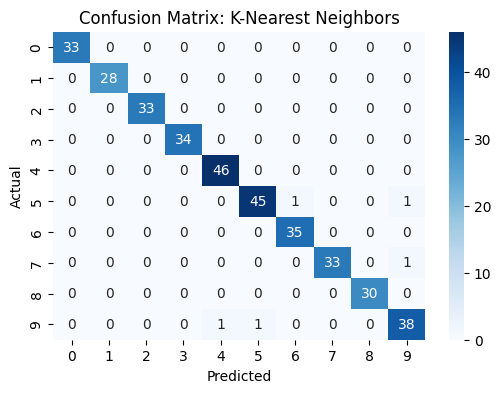

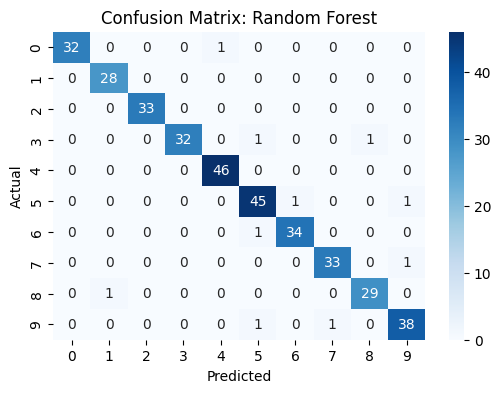

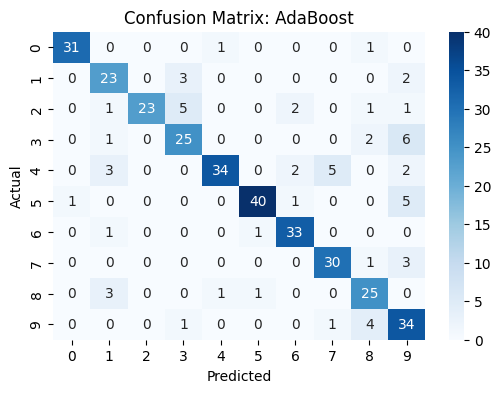

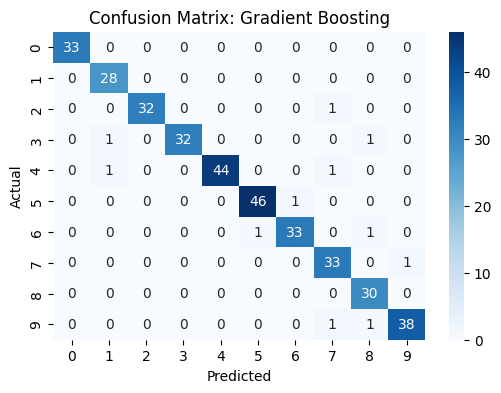

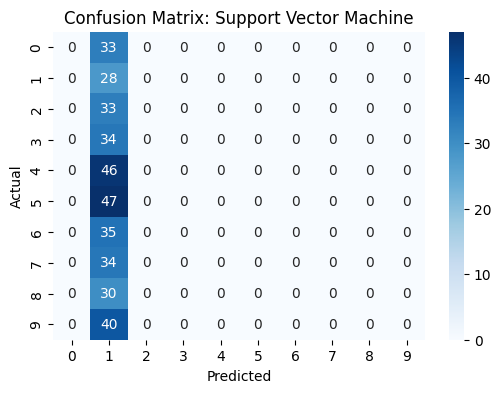

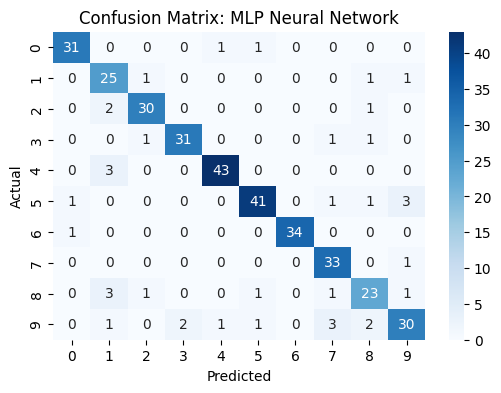

In [52]:
# Display Confusion Matrices for Each Model
for name, matrix in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=digits_data.target_names, yticklabels=digits_data.target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

In [53]:
# Test a Random Sample from Test Set
random_index = np.random.randint(0, len(X_test))
test_sample = X_test[random_index].reshape(1, -1)
best_model = trained_models["MLP Neural Network"]
predicted_label = best_model.predict(test_sample)

In [54]:
# Predict using the best model (choosing KNN for now)
best_model = models["K-Nearest Neighbors"]
predicted_label = best_model.predict(test_sample)

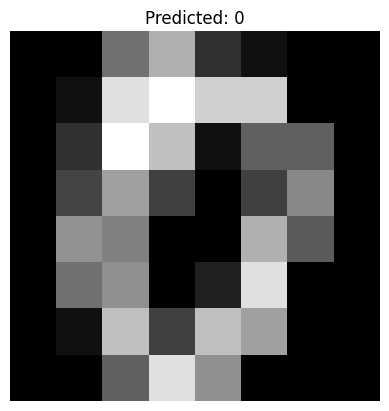

In [55]:
# Display the Test Image with Prediction
plt.imshow(X_test[random_index].reshape(8, 8), cmap='gray')
plt.title(f"Predicted: {predicted_label[0]}")
plt.axis('off')
plt.show()